In [1]:
import pandas as pd

file_path_corrres = r'F:\Uni Y3\tesi\corrres.xlsx'
file_path_fp2 = r'F:\Uni Y3\tesi\fp4.xlsx'

df_corrres = pd.read_excel(file_path_corrres)
df_fp2 = pd.read_excel(file_path_fp2)


C:\Users\marco\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# extract the rows where the correlation in the 2nd column is greater than 0.7
filtered_df = df_corrres[df_corrres.iloc[:, 1] > 0.7]

# extract the values from the 4th column starting from the second row skipping the first row 
column_values = filtered_df.iloc[1:, 3]  skips the first row 

# convert the column values to a list and count the frequency
frequency_count = column_values.value_counts()

# Filter the numbers with a recurrence bigger than x, in the experiments this has been 1 10 25
frequent_numbers = frequency_count[frequency_count > 1]

print(frequent_numbers)



Row_Index
3898     269
4629     186
287      183
3220     177
4860     176
        ... 
7862       2
10344      2
1735       2
4516       2
404        2
Name: count, Length: 362, dtype: int64


In [3]:
# get the values in the first column corresponding to the row indices of frequent numbers
corresponding_values = df_fp2.iloc[frequent_numbers.index+1, 0]

# trim at the dot
trimmed_values = corresponding_values.apply(lambda x: x.split('.')[0])

for value in trimmed_values:
    print(value)

ENSG00000125863
ENSG00000134504
ENSG00000022840
ENSG00000116954
ENSG00000136448
ENSG00000131067
ENSG00000197381
ENSG00000181704
ENSG00000101596
ENSG00000162522
ENSG00000172469
ENSG00000153363
ENSG00000135473
ENSG00000178567
ENSG00000253719
ENSG00000162704
ENSG00000132773
ENSG00000116514
ENSG00000134748
ENSG00000101443
ENSG00000217624
ENSG00000102753
ENSG00000110074
ENSG00000134755
ENSG00000188536
ENSG00000065054
ENSG00000257621
ENSG00000178035
ENSG00000001617
ENSG00000276291
ENSG00000267481
ENSG00000168014
ENSG00000164815
ENSG00000173598
ENSG00000067334
ENSG00000135480
ENSG00000139496
ENSG00000122971
ENSG00000146858
ENSG00000186814
ENSG00000066185
ENSG00000101182
ENSG00000177045
ENSG00000083168
ENSG00000137221
ENSG00000153975
ENSG00000221821
ENSG00000232472
ENSG00000188747
ENSG00000215915
ENSG00000184428
ENSG00000213699
ENSG00000234127
ENSG00000198000
ENSG00000079150
ENSG00000187164
ENSG00000087365
ENSG00000115128
ENSG00000224877
ENSG00000111737
ENSG00000139168
ENSG00000224631
ENSG0000

In [4]:
# extract the values from the 4th column starting from the second row
column_values2 = df_corrres.iloc[1:, 0]  

# convert the column values to a list and count the frequency
frequency_count2 = column_values2.value_counts()

# filter numbers with recurrence bigger than x, in the experiments this has been 1 10 25
frequent_numbers2 = frequency_count2[frequency_count2 > 0]

print(frequent_numbers2)


Feature
1255    318
1558    193
66      182
1328    178
705     177
       ... 
1900      2
1208      2
1441      1
267       1
1001      1
Name: count, Length: 1037, dtype: int64


In [5]:
# filter rows with correlation greater than 0.7, 0.8 and 0.9
correlation_07 = df_corrres[df_corrres.iloc[:, 1] > 0.7]

correlation_08 = df_corrres[df_corrres.iloc[:, 1] > 0.8]

correlation_09 = df_corrres[df_corrres.iloc[:, 1] > 0.9]


In [6]:
column_values2 = correlation_08.iloc[1:, 0]  
frequent_numbers2 = frequency_count2[frequency_count2 > 0]

print(frequent_numbers2)

Feature
1558    6
705     5
1986    5
1255    5
66      4
       ..
1089    1
1060    1
1033    1
958     1
591     1
Name: count, Length: 157, dtype: int64


In [7]:
column_values2 = correlation_07.iloc[1:, 0] 
frequency_count2 = column_values2.value_counts()
frequent_numbers2 = frequency_count2[frequency_count2 > 0]

print(frequent_numbers2)

Feature
1255    66
66      46
1558    44
705     43
1087    39
        ..
403      1
24       1
1710     1
528      1
851      1
Name: count, Length: 931, dtype: int64


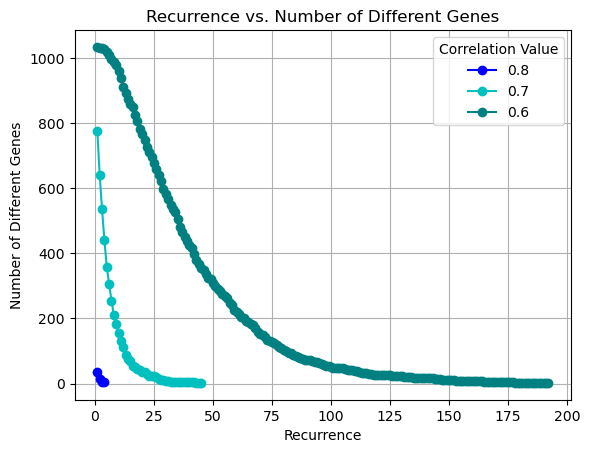

In [13]:
import matplotlib.pyplot as plt

def plot_frequent_numbers(correlation_value, label, color):
    column_values = correlation_value.iloc[1:, 0] 

    frequency_count = column_values.value_counts()

    threshold = 1  
    frequent_numbers_counts = []

    while True:
        frequent_numbers = frequency_count[frequency_count > threshold]

        if len(frequent_numbers) == 1:
            break

        threshold += 1  

        frequent_numbers_counts.append(len(frequent_numbers))

    plt.plot(range(1, len(frequent_numbers_counts) + 1), frequent_numbers_counts, marker='o', label=label, color=color)
    plt.xlabel('recurrence')
    plt.ylabel('number of different genes')
    plt.title('recurrence vs. number of different genes')
    plt.grid(True)

plot_frequent_numbers(correlation_08, "0.8", color='b')
plot_frequent_numbers(correlation_07, "0.7", color='c')
plot_frequent_numbers(df_corrres, "0.6", color='teal')
plt.legend(title="correlation value")
plt.show()


In [55]:
import pandas as pd

features = df_corrres['Feature']
row_indices = df_corrres['Row_Index']

#dictionary to store the counts of combinations
combination_counts = {}

for feature, row_index in zip(features, row_indices):
    # create tuple representing the combination of feature and row_index
    combination = (feature, row_index)
    
    combination_counts[combination] = combination_counts.get(combination, 0) + 1

print("Combinations occurring more than once:")
total_count = 0
for combination, count in combination_counts.items():
    if count > 1:
        print(combination, ":", count)
    total_count += count

print("Total combinations:", total_count)



Combinations occurring more than once:
Total combinations: 43614
